In [1]:
%run setup.ipynb

In [4]:
fine_base, fine_baseinfo = load_function("fine_base.tar")
fine_base.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_loss(title, info, ax, ylim_top=0.5, ylim_bot=0, xlim_top=11, xlim_bot=0):
    train = info["train_loss"]
    val = info["val_loss"]
    ax.set_title(title)
    ax.plot(np.arange(1, len(train)+1), train, '-', label="train")
    ax.plot(np.arange(1, len(val)+1), val, '-', label="val")
    ax.set_ylim(ylim_bot, ylim_top)
    ax.set_xlim(xlim_bot,xlim_top)
    ax.legend()

def plot_acc(title, info, ax, ylim_top=1.01, ylim_bot=0.5, xlim_top=11, xlim_bot=0):
    train = info["train_acc"]
    val = info["val_acc"]
    ax.set_title(title)
    ax.plot(np.arange(1, len(train)+1), train, '-', label="train")
    ax.plot(np.arange(1, len(val)+1), val, '-', label="val")
    ax.set_ylim(ylim_bot, ylim_top)
    ax.set_xlim(xlim_bot,xlim_top)
    ax.legend()

## Aug1 in finetuning only 

In [3]:
# load in the basemodel (trained while frozen)
model_aug1fine, info_aug1fine = load_function("base_lr0.0005.tar")
unfreeze_layer4(model_aug1fine)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug1fine.parameters()), lr=lr)

# begin finetuning
model_aug1fine, info_aug1fine = train_model(model_aug1fine, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.0599 Acc: 0.9844
Val Loss: 0.0429 Acc: 0.9712
Epoch time 0m 49s
----------

Epoch 2/10
----------
Train Loss: 0.0098 Acc: 0.9976
Val Loss: 0.0385 Acc: 0.9712
Epoch time 0m 45s
----------

Epoch 3/10
----------
Train Loss: 0.0051 Acc: 0.9988
Val Loss: 0.0428 Acc: 0.9712
Epoch time 0m 48s
----------

Epoch 4/10
----------
Train Loss: 0.0055 Acc: 0.9988
Val Loss: 0.0247 Acc: 0.9904
Epoch time 0m 48s
----------

Epoch 5/10
----------
Train Loss: 0.0104 Acc: 0.9964
Val Loss: 0.0429 Acc: 0.9904
Epoch time 0m 49s
----------

Epoch 6/10
----------
Train Loss: 0.0048 Acc: 1.0000
Val Loss: 0.0424 Acc: 0.9904
Epoch time 0m 49s
----------

Epoch 7/10
----------
Train Loss: 0.0075 Acc: 0.9976
Val Loss: 0.0407 Acc: 0.9904
Epoch time 1m 4s
----------

Epoch 8/10
----------
Train Loss: 0.0005 Acc: 1.0000
Val Loss: 0.0261 Acc: 0.9904
Epoch time 3m 5s
----------

Epoch 9/10
----------
Train Loss: 0.0005 Acc: 1.0000
Val Loss: 0.0353 Acc: 0.9808
Epoch time 0m 51s
------

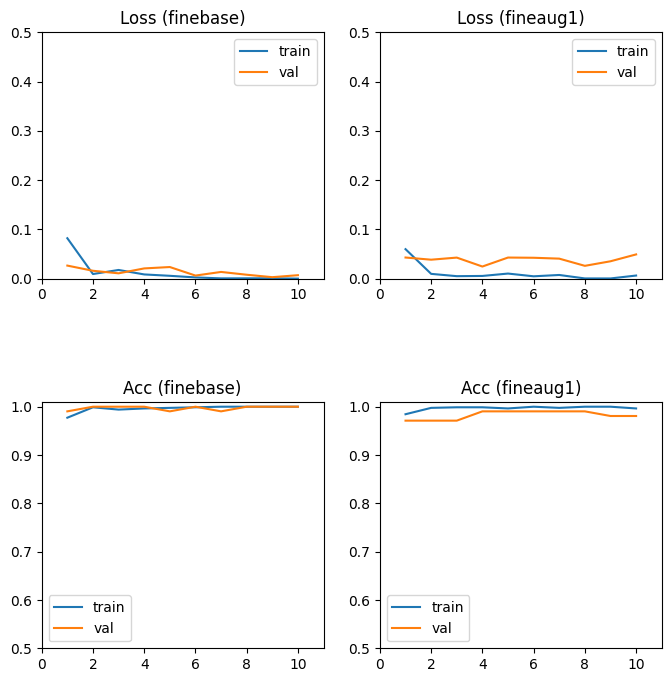

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plot_loss("Loss (finebase)", fine_baseinfo, axs[0],)
plot_loss("Loss (fineaug1)", info_aug1fine, axs[1])
plot_acc("Acc (finebase)", fine_baseinfo, axs[2])
plot_acc("Acc (fineaug1)", info_aug1fine, axs[3])

In [7]:
truel_aug1fine, predl_aug1fine = labels_and_predictions(dataloader_test, model_aug1fine, device)
print("Acc finebase: {:.4f}".format(fine_baseinfo["test_acc"]))
print("Acc fineaug1: {:.4f}".format(accuracy(truel_aug1fine, predl_aug1fine))) 

Acc finebase: 99.0476
Acc fineaug1: 98.0952


## Aug1 in all steps 

In [10]:
# load in the basemodel (trained while frozen)
model_aug1full, info_aug1full = load_function("aug1Model_50.tar", model_key="aug", info_key="aug_info")
unfreeze_layer4(model_aug1full)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug1full.parameters()), lr=lr)

# begin finetuning
model_aug1full, info_aug1full = train_model(model_aug1full, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.0937 Acc: 0.9737
Val Loss: 0.0745 Acc: 0.9712
Epoch time 1m 13s
----------

Epoch 2/10
----------
Train Loss: 0.0231 Acc: 0.9964
Val Loss: 0.0076 Acc: 1.0000
Epoch time 4m 11s
----------

Epoch 3/10
----------
Train Loss: 0.0022 Acc: 1.0000
Val Loss: 0.0056 Acc: 1.0000
Epoch time 3m 34s
----------

Epoch 4/10
----------
Train Loss: 0.0068 Acc: 0.9976
Val Loss: 0.0073 Acc: 1.0000
Epoch time 3m 28s
----------

Epoch 5/10
----------
Train Loss: 0.0017 Acc: 0.9988
Val Loss: 0.0028 Acc: 1.0000
Epoch time 2m 54s
----------

Epoch 6/10
----------
Train Loss: 0.0051 Acc: 0.9988
Val Loss: 0.0095 Acc: 0.9904
Epoch time 2m 3s
----------

Epoch 7/10
----------
Train Loss: 0.0163 Acc: 0.9964
Val Loss: 0.0184 Acc: 0.9904
Epoch time 1m 1s
----------

Epoch 8/10
----------
Train Loss: 0.0045 Acc: 0.9988
Val Loss: 0.0586 Acc: 0.9808
Epoch time 1m 4s
----------

Epoch 9/10
----------
Train Loss: 0.0010 Acc: 1.0000
Val Loss: 0.0097 Acc: 1.0000
Epoch time 1m 27s
-------

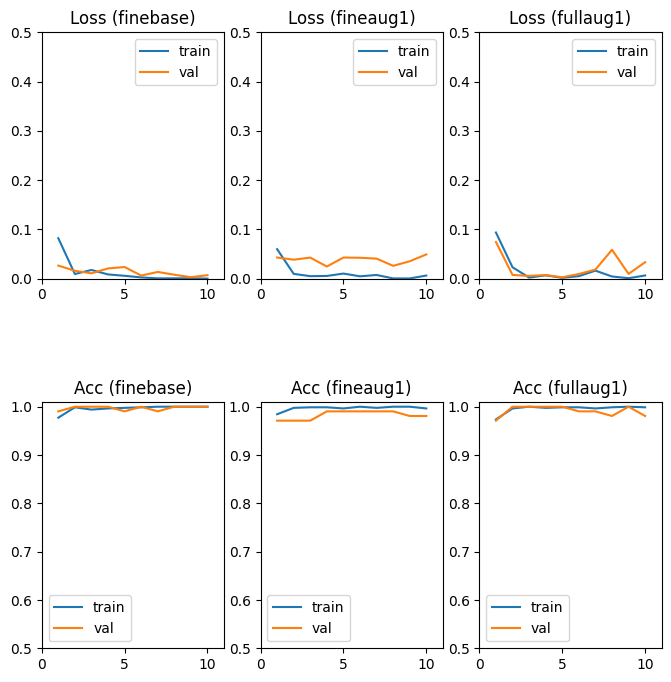

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(8,8))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plot_loss("Loss (finebase)", fine_baseinfo, axs[0],)
plot_loss("Loss (fineaug1)", info_aug1fine, axs[1])
plot_loss("Loss (fullaug1)", info_aug1full, axs[2])
plot_acc("Acc (finebase)", fine_baseinfo, axs[3])
plot_acc("Acc (fineaug1)", info_aug1fine, axs[4])
plot_acc("Acc (fullaug1)", info_aug1full, axs[5])

In [22]:
truel_aug1full, predl_aug1full = labels_and_predictions(dataloader_test, model_aug1full, device)
print("Acc finebase: {:.4f}".format(fine_baseinfo["test_acc"]))
print("Acc fineaug1: {:.4f}".format(accuracy(truel_aug1fine, predl_aug1fine))) 
print("Acc fullaug1: {:.4f}".format(accuracy(truel_aug1full, predl_aug1full)))

Acc finebase: 99.0476
Acc fineaug1: 98.0952
Acc fullaug1: 98.0952


## Aug 1 all steps, but only 5 epochs finetuning

In [14]:
# load in the basemodel (trained while frozen)
model_aug1fulle5, info_aug1fulle5 = load_function("aug1Model_50.tar", model_key="aug", info_key="aug_info")
unfreeze_layer4(model_aug1fulle5)

epochs = 5
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug1fulle5.parameters()), lr=lr)

# begin finetuning
model_aug1fulle5, info_aug1fulle5 = train_model(model_aug1fulle5, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/5
----------
Train Loss: 0.0916 Acc: 0.9713
Val Loss: 0.0319 Acc: 0.9904
Epoch time 1m 60s
----------

Epoch 2/5
----------
Train Loss: 0.0144 Acc: 0.9952
Val Loss: 0.0111 Acc: 1.0000
Epoch time 2m 23s
----------

Epoch 3/5
----------
Train Loss: 0.0023 Acc: 1.0000
Val Loss: 0.0060 Acc: 1.0000
Epoch time 3m 3s
----------

Epoch 4/5
----------
Train Loss: 0.0007 Acc: 1.0000
Val Loss: 0.0049 Acc: 1.0000
Epoch time 2m 57s
----------

Epoch 5/5
----------
Train Loss: 0.0007 Acc: 1.0000
Val Loss: 0.0048 Acc: 1.0000
Epoch time 2m 49s
----------

Training complete in 13m 12s
Validation accuracies:
[0.9903846153846154, 1.0, 1.0, 1.0, 1.0]
Training accuracies:
[0.9712574850299401, 0.9952095808383233, 1.0, 1.0, 1.0]
Best model had accuracy 1.0000, loss 0.0048 at epoch 5


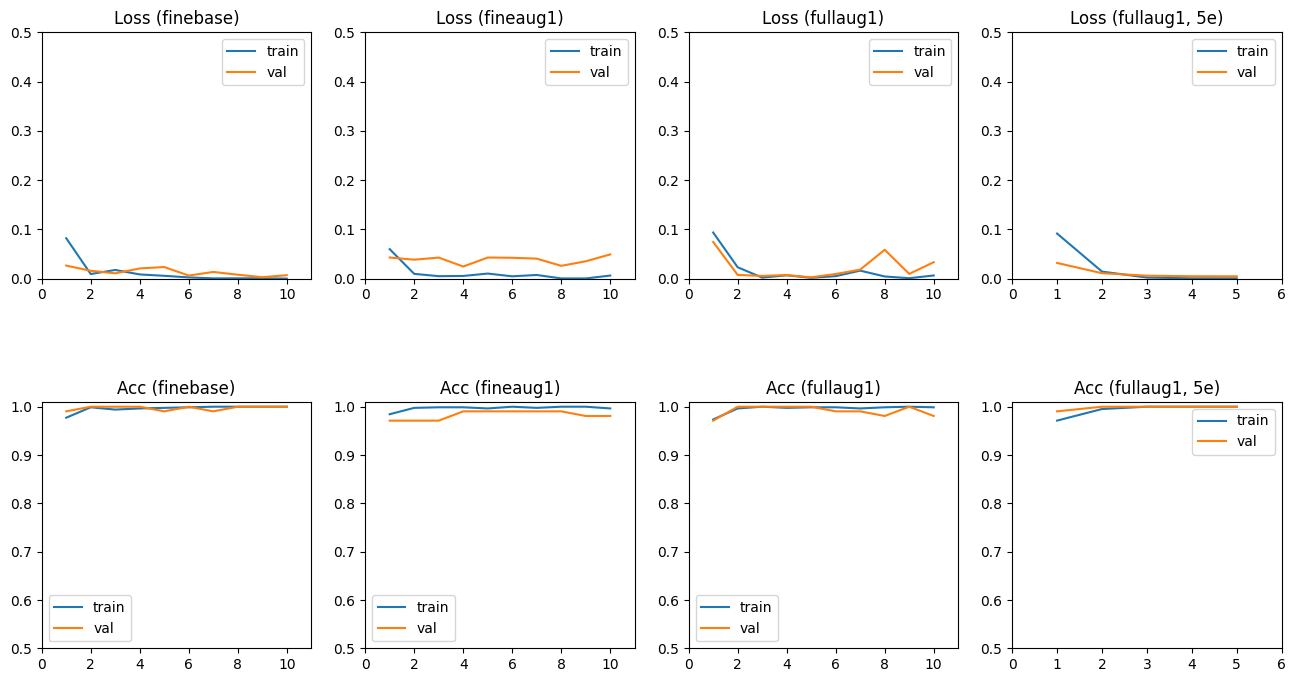

In [21]:
fig, axs = plt.subplots(2, 4, figsize=(16,8))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plot_loss("Loss (finebase)", fine_baseinfo, axs[0],)
plot_loss("Loss (fineaug1)", info_aug1fine, axs[1])
plot_loss("Loss (fullaug1)", info_aug1full, axs[2])
plot_loss("Loss (fullaug1, 5e)", info_aug1fulle5, axs[3], xlim_top=6)
plot_acc("Acc (finebase)", fine_baseinfo, axs[4])
plot_acc("Acc (fineaug1)", info_aug1fine, axs[5])
plot_acc("Acc (fullaug1)", info_aug1full, axs[6])
plot_acc("Acc (fullaug1, 5e)", info_aug1fulle5, axs[7], xlim_top=6)

In [23]:
truel_aug1fulle5, predl_aug1fulle5 = labels_and_predictions(dataloader_test, model_aug1fulle5, device)
print("Acc finebase: {:.4f}".format(fine_baseinfo["test_acc"]))
print("Acc fineaug1: {:.4f}".format(accuracy(truel_aug1fine, predl_aug1fine))) 
print("Acc fullaug1: {:.4f}".format(accuracy(truel_aug1full, predl_aug1full)))
print("Acc fullaug1e5: {:.4f}".format(accuracy(truel_aug1fulle5, predl_aug1fulle5)))

Acc finebase: 99.0476
Acc fineaug1: 98.0952
Acc fullaug1: 98.0952
Acc fullaug1e5: 97.1429
